### 决策树算法理解

In [16]:
import pandas as pd
import numpy as np
import scorecardpy as sc
pd.set_option('display.max_columns', None)

In [51]:
bad_df = pd.DataFrame(data={
    "sex":['男', '男', '女', '男', '女', '男'],
    "status":['单身', '已婚', '已婚', '单身', '已婚', '单身'],
    "age":[39, 25, 26, 26, 21, 27],
    "month":[15, 12, 12, 42, 30, 48],
    "amount":[1271, 1484, 609, 4370, 3441, 10961],
    "y":["bad"]*6,
})

In [57]:
good_df = pd.DataFrame(data={
    "sex":['男','女','女','男','男','女','男','男','女','男','女','男','男','男'],
    "status":['单身','已婚','已婚','单身','单身','已婚','单身','单身','已婚','单身','已婚','单身','单身','单身'],
    "age":[29, 26, 26, 47, 32, 59, 56, 51, 31, 23, 28, 45, 36, 36],
    "month":[24, 12, 24, 15, 48, 15, 12, 6, 21, 13, 24, 6, 36, 12],
    "amount":[2333,763,2812,1213,7238,5045,618,1595,2782,882,1376,1750,2337,1542],
    "y":["good"]*14,
})

In [58]:
df = pd.concat(objs=[bad_df,good_df],ignore_index=True)

In [59]:
df

,sex,status,age,month,amount,y
0,男,单身,39,15,1271,bad
1,男,已婚,25,12,1484,bad
2,女,已婚,26,12,609,bad
3,男,单身,26,42,4370,bad
4,女,已婚,21,30,3441,bad
5,男,单身,27,48,10961,bad
6,男,单身,29,24,2333,good
7,女,已婚,26,12,763,good
8,女,已婚,26,24,2812,good
9,男,单身,47,15,1213,good


解释：sex：性别，status：婚姻状况，age：年龄，month：贷款期限，amount：贷款金额，y：是否逾期，bad逾期；good未逾期

#### 现在有一个人，sex=男，status=单身，age=24，month=12，amount=2000，根据上面的信息，判断y应该是good or bad？
- 根据上面的信息，并没有直接的答案，比如：当age<20，y就是bad。找不到类似这样的结论。
- 可以选用决策树算法来判断，如下图。从上往下走，最后结果为1（bad）

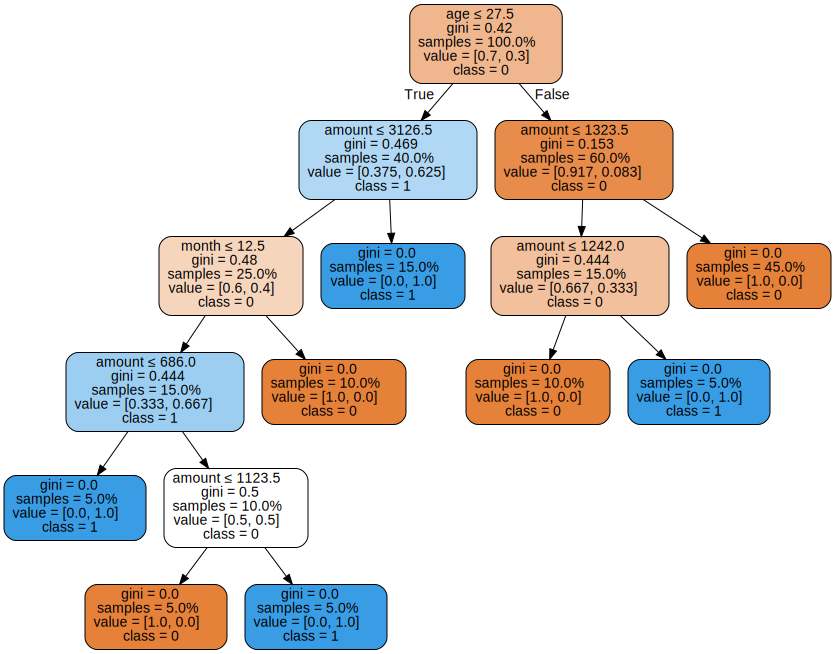

In [119]:
graph

#### 决策树解决问题
参考地址：https://www.cnblogs.com/keye/p/10564914.html  

sklearn地址：https://scikit-learn.org/stable/modules/tree.html
  
**简单了解一下CART（Classification And Regression Tree）**
- 最核心的一个概念，GINI系数。
$$
GINI_k=\frac{T_k}{T}*(2*\frac{T_{k0}}{T_{k1}}*\frac{T_k}{T_k})+\frac{S}{T}*(2*\frac{T_{s0}}{S}*\frac{T_{s1}}{S})
$$

$$
\begin{equation}\begin{split} 
&T:总样本数\\
&T_k:第k个分组的样本数\\
&T_{k0}:第k个分组的样本中y=0的样本数\\
&T_{k1}:第k个分组的样本中y=1的样本数\\
&S=T-T_k,去掉k个分组之后的所有样本数据\\
&T_{s0}:S中y=0的样本数\\
&T_{s1}:S中y=1的样本数\\
\end{split}\end{equation}
$$
- 步骤：（数值型数据，比如收入）
    1. 对收入数据去重排序后，相邻的数据取平均数，得到A1，A2，A3，...
    2. 以A1，A2，A3，...为分界线，计算每一个A对应的GINI系数，
    3. 选择最小的GINI系数为分割点，继续第1,2步，直到达到条件结束
    4. 最小的GINI系数小于阈值，结束。
    5. 数的深度（划分的区间）小于指定的区间，结束。
-  步骤：（分类型数据，比如婚姻）
    1. 分类型数据，数据已经分好，比如分为单身（A1），已婚（A2），离婚（A3），其他（A4）
    2. 计算所有组合的GINI系数
    3. 选择最小的GINI系数为分割点，继续第1,2步，直到达到条件结束
    4. 最小的GINI系数小于阈值，结束。
    5. 数的深度（划分的区间）小于指定的区间，结束。
- 决策树步骤：
    1. 计算所有特征每一个分组的GINI系数，最小的GINI系数为根节点，划分好数据
    2. 继续计算每个划分好的GINI系数，找出最小的GINI系数，为根节点，继续重复
    3. 最小的GINI系数小于阈值，结束。
    4. 数的深度（划分的区间）小于指定的区间，结束。

In [68]:
# 修改一下数据类型，
# sex：0（男），1（女）
# status：0（单身），1（已婚）
# y：0（good），1（bad）
df2["sex"] = df2["sex"].map(lambda x:0 if x=="男" else 1)
df2["status"] = df2["status"].map(lambda x:0 if x=="单身" else 1)
df2["y"] = df2["y"].map(lambda x:0 if x=="good" else 1)

In [116]:
from sklearn import tree
X, y = df2.iloc[:,:-1],df2.iloc[:,-1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

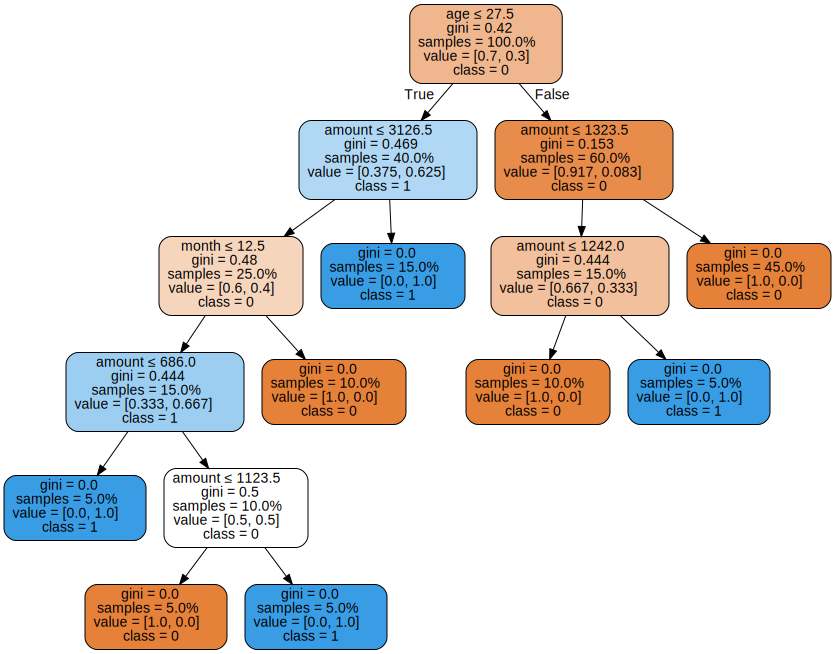

In [117]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
# graph.render("tree") pdf
iris = load_iris()
dot_data = tree.export_graphviz(clf, out_file=None,proportion=True, 
                     feature_names=['sex', 'status', 'age', 'month', 'amount',],  
                     class_names=["0","1"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [97]:
# 预测sex=男，status=单身，age=24，month=12，amount=2000，的结果
clf.predict(X=[[0,0,24,12,2000]])

array([1])

预测结果为1,（bad），所以可能为逾期用户。